# Programa básico para análisar Poligonal de uma determinada Área

In [1]:
%pwd

from os import chdir
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

plt.style.use('fivethirtyeight')

try:
    chdir(globals()['_dh'][-1] + '\\2019_Py_LSP\\Notebook')
except Exception as error:
    print(error)
    quit()

### Abre arquivo de Pontos e Lista os 5 ultimos pontos

In [2]:
eixo = pd.read_csv('Poligonal.csv', header=0, index_col=0)
eixo.tail()

,Norte,Este,Elevacao
REG,,,
178,7.825215e+06,685737.981350,789.0
179,7.825216e+06,685732.038884,788.0
180,7.825216e+06,685726.096418,787.0
181,7.825217e+06,685720.153952,786.0
182,7.825217e+06,685714.211486,785.0


### Calcula a Distancia entre todos os pontos na lista

In [3]:
eixo['Distancia (m)'] = (((eixo['Norte'].shift(1) - eixo['Norte'])**2) + ((eixo['Este'].shift(1) - eixo['Este'])**2)) ** 0.5
eixo = eixo.fillna(0)
eixo.head()

,Norte,Este,Elevacao,Distancia (m)
REG,,,,
1,7.825217e+06,685714.211486,785.0,0.000000
2,7.825217e+06,685708.269019,784.0,5.957345
3,7.825218e+06,685702.664038,783.0,5.671017
4,7.825220e+06,685697.582504,782.0,5.312288
5,7.825223e+06,685691.698235,781.0,6.598723


### Lista as distancias de forma progressiva

In [4]:
dist_prog = []
ini_d = 0
for d in eixo['Distancia (m)']:
    ini_d += d
    dist_prog.append(ini_d)

eixo['Progressiva (m)'] = dist_prog

eixo.head()

,Norte,Este,Elevacao,Distancia (m),Progressiva (m)
REG,,,,,
1,7.825217e+06,685714.211486,785.0,0.000000,0.000000
2,7.825217e+06,685708.269019,784.0,5.957345,5.957345
3,7.825218e+06,685702.664038,783.0,5.671017,11.628362
4,7.825220e+06,685697.582504,782.0,5.312288,16.940650
5,7.825223e+06,685691.698235,781.0,6.598723,23.539373


### Calcula a inclinação entre pontos

In [5]:
eixo['Inclinacao (%)'] = ((eixo['Elevacao'] - eixo['Elevacao'].shift(1)) / eixo['Distancia (m)']) * 100
eixo = eixo.fillna(0)
eixo.tail()

,Norte,Este,Elevacao,Distancia (m),Progressiva (m),Inclinacao (%)
REG,,,,,,
178,7.825215e+06,685737.981350,789.0,5.661830,1450.097792,-17.662134
179,7.825216e+06,685732.038884,788.0,5.957345,1456.055136,-16.786002
180,7.825216e+06,685726.096418,787.0,5.957344,1462.012480,-16.786003
181,7.825217e+06,685720.153952,786.0,5.957344,1467.969825,-16.786003
182,7.825217e+06,685714.211486,785.0,5.957345,1473.927169,-16.786002


### Imprime um Gráfico com Planta e Perfil dos Pontos

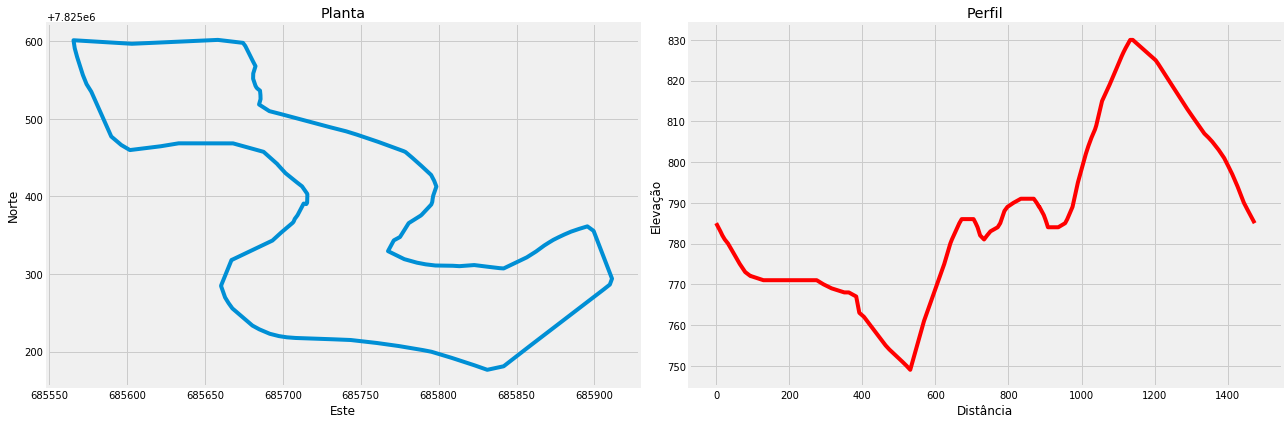

In [6]:
fig, (Planta, Perfil) = plt.subplots(ncols=2, nrows=1, figsize=(18,6), sharex=False, sharey=False)
Planta.plot(eixo['Este'], eixo['Norte'])
Perfil.plot(eixo['Progressiva (m)'], eixo['Elevacao'], color='r')


Planta.set_xlabel('Este')
Planta.set_ylabel('Norte')

Perfil.set_xlabel('Distância')
Perfil.set_ylabel('Elevação')

Planta.set_title('Planta')
Perfil.set_title('Perfil')

fig.tight_layout()

plt.show()

### Encontra as Elevações de destaque da poligonal

In [7]:
Elev_Max = eixo['Elevacao'].max()
Elev_Min = eixo['Elevacao'].min()
print(f'Elevação Máxima : {Elev_Max:0.3f}, Elevação Mínima : {Elev_Min:0.3f} / Diferença = {Elev_Max - Elev_Min:0.3f}m')

Elevação Máxima : 830.000, Elevação Mínima : 749.000 / Diferença = 81.000m


### Encontra as inclinações de maior destaque da poligonal

In [8]:
Inc_Max = eixo['Inclinacao (%)'].max()
Inc_Min = eixo['Inclinacao (%)'].min()
Inc_ABS_Max = np.abs(eixo['Inclinacao (%)']).max()
Inc_ABS_Min = np.abs(eixo['Inclinacao (%)']).min()
Inc_Mean = np.abs(eixo['Inclinacao (%)']).mean()
print(f'Inclinação Máxima / (Absoluto) : {Inc_Max:0.3f}% / ({Inc_ABS_Max:0.3f}%), Inclinação Mínima / (Absoluto) : {Inc_Min:0.3f}% / ({Inc_ABS_Min:0.3f}%), Inclinação Média : {Inc_Mean:0.3f}%')

Inclinação Máxima / (Absoluto) : 40.738% / (46.965%), Inclinação Mínima / (Absoluto) : -46.965% / (0.000%), Inclinação Média : 14.602%


### Calcula a Área do Poligono

In [9]:
x_ = np.array(eixo['Este'] - eixo['Este'].mean())
y_ = np.array(eixo['Norte'] - eixo['Norte'].mean())

correction = x_[-1] * y_[0] - y_[-1] * x_[0]
main_area = np.dot(x_[:-1], y_[1:]) - np.dot(y_[:-1], x_[1:])
Area_Poligonal = 0.5 * np.abs(main_area + correction)

print(f'Área da Poligonal : {Area_Poligonal:0.3f}m²')

Área da Poligonal : 54524.596m²


In [11]:
eixo.to_excel('Arquivo_Análisado.xlsx')